<a href="https://colab.research.google.com/github/AbdAllAh950/Algorithms/blob/main/T6_%D0%98%D1%81%D1%81%D0%B0_%D0%90%D0%B1%D0%B4%D0%B0%D0%BB%D0%BB%D0%B0(Abdallah_Essa).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook applies Dijkstra's, A*, and Bellman-Ford algorithms to find paths in weighted graphs and grids with obstacles. We will compare their performance and analyze the results.\
We will create a random weighted graph with 100 nodes and 500 edges. Using Dijkstra's and Bellman-Ford algorithms, we'll find the shortest paths from a starting node to others and measure the time for each algorithm.



In [ ]:
# Graph Generation:
import numpy as np
import random

# Create a 100x100 matrix initialized to zero
num_vertices = 100
num_edges = 500
adj_matrix = np.zeros((num_vertices, num_vertices), dtype=int)

# Add random edges with weights between 1 and 20
edges_added = 0
while edges_added < num_edges:
    i, j = random.randint(0, num_vertices-1), random.randint(0, num_vertices-1)
    if i != j and adj_matrix[i, j] == 0:
        weight = random.randint(1, 20)
        adj_matrix[i, j] = weight
        adj_matrix[j, i] = weight
        edges_added += 1

print("Generated Adjacency Matrix (with random weights):\n", adj_matrix)

Generated Adjacency Matrix (with random weights):
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Dijkstra’s Algorithm:
import heapq
import time

# Dijkstra's Algorithm
def dijkstra(matrix, start):
    distances = [float('inf')] * len(matrix)
    distances[start] = 0
    queue = [(0, start)]

    while queue:
        current_distance, node = heapq.heappop(queue)
        for neighbor in range(len(matrix)):
            if matrix[node][neighbor] > 0:  # there's an edge
                distance = current_distance + matrix[node][neighbor]
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    heapq.heappush(queue, (distance, neighbor))
    return distances

# Run and time Dijkstra's
start_vertex = random.randint(0, num_vertices - 1)
times = []
for _ in range(10):
    start_time = time.time()
    dijkstra(adj_matrix, start_vertex)
    times.append(time.time() - start_time)

print(f"Average time for Dijkstra's Algorithm: {np.mean(times)} seconds")

Average time for Dijkstra's Algorithm: 0.01031181812286377 seconds


In [ ]:
# Bellman-Ford Algorithm
def bellman_ford(matrix, start):
    distances = [float('inf')] * len(matrix)
    distances[start] = 0

    for _ in range(len(matrix) - 1):
        for u in range(len(matrix)):
            for v in range(len(matrix)):
                if matrix[u][v] > 0 and distances[u] + matrix[u][v] < distances[v]:
                    distances[v] = distances[u] + matrix[u][v]
    return distances

# Run and time Bellman-Ford
times = []
for _ in range(10):
    start_time = time.time()
    bellman_ford(adj_matrix, start_vertex)
    times.append(time.time() - start_time)

print(f"Average time for Bellman-Ford Algorithm: {np.mean(times)} seconds")

Average time for Bellman-Ford Algorithm: 0.7137397766113281 seconds


We'll create a 10x20 grid with random obstacles. Then, we'll use the A* algorithm to find a path between two random non-obstacle cells.


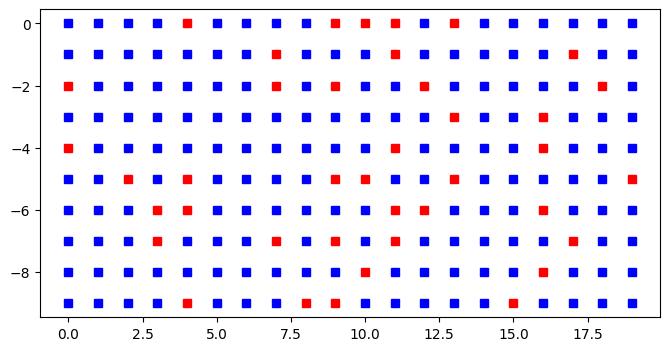

In [ ]:
# Create Grid with Obstacles:
import matplotlib.pyplot as plt

# Generate grid with obstacles
grid = np.zeros((10, 20), dtype=int)
obstacles = random.sample(range(10 * 20), 40)  # 40 random obstacles
for obs in obstacles:
    grid[obs // 20][obs % 20] = -1  # mark obstacles

# Display the grid
def display_grid(grid, path=[]):
    plt.figure(figsize=(8, 4))
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if grid[i, j] == -1:
                plt.plot(j, -i, 'rs')  # red squares for obstacles
            elif (i, j) in path:
                plt.plot(j, -i, 'go')  # green path
            else:
                plt.plot(j, -i, 'bs')  # blue for free cells
    plt.show()

display_grid(grid)

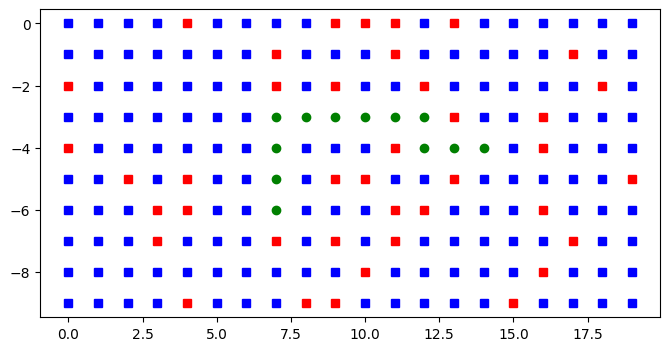

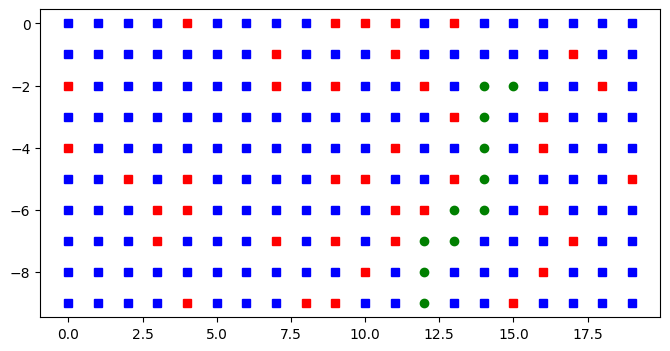

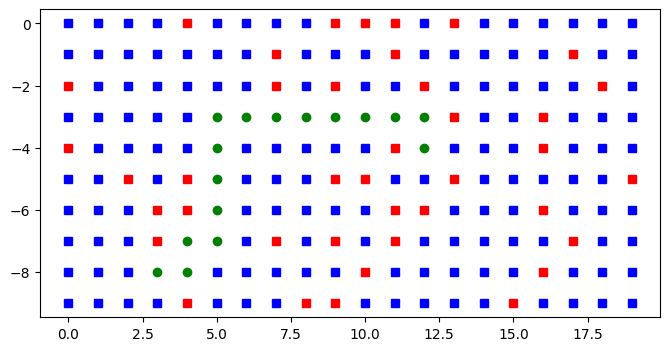

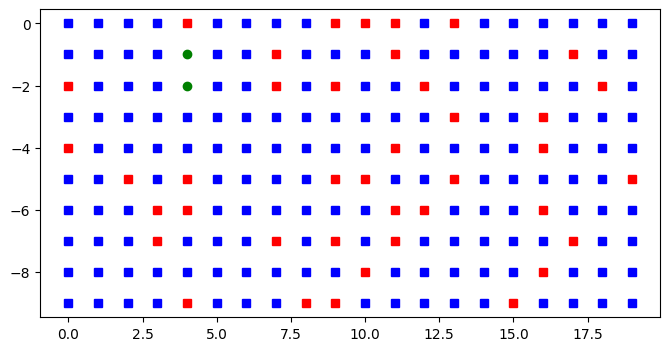

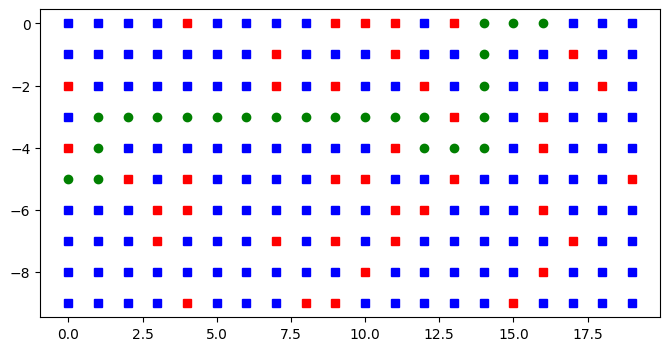

In [ ]:
#  A Algorithm*:
from heapq import heappop, heappush

# A* Pathfinding Algorithm
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(grid, start, end):
    rows, cols = grid.shape
    open_list = []
    heappush(open_list, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, end)}

    while open_list:
        _, current = heappop(open_list)

        if current == end:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] != -1:
                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, end)
                    heappush(open_list, (f_score[neighbor], neighbor))

    return None

# Run A* with random start and end points
for _ in range(5):
    start = (random.randint(0, 9), random.randint(0, 19))
    end = (random.randint(0, 9), random.randint(0, 19))
    while grid[start] == -1 or grid[end] == -1:
        start = (random.randint(0, 9), random.randint(0, 19))
        end = (random.randint(0, 9), random.randint(0, 19))
    path = a_star(grid, start, end)
    if path:
        display_grid(grid, path)


1. **Dijkstra's Algorithm**: Uses a priority queue to keep track of minimum distances efficiently.
2. **Bellman-Ford Algorithm**: Relies on repeated relaxation of edges, useful when negative weights are present.
3. **A* Algorithm**: Uses a heuristic (Manhattan distance) to guide the search and find paths quickly, especially in grids.

we found that Dijkstra's algorithm performs faster than Bellman-Ford on our randomly generated weighted graph. The A* algorithm effectively finds paths in a grid with obstacles. Each algorithm has its own strengths based on the graph structure and requirements.